# Perkenalan

1. Nama    : I Made Dhanan Pradipta
2. Batch   : 10

Objectives : 
- Mampu memahami konsep Artificial Neural Network.
- Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
- Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
- Mampu menganalisis dan menjelaskan layer yang dibuat

Datset     : WA_Fn-UseC_-Telco-Customer-Churn.csv



---
# Import Library

In [2]:
#library for processing
import pandas as pd
import numpy as np
#library for viz
import matplotlib.pyplot as plt
import seaborn as sns

---
# Data Loading

In [3]:
data = pd.read_csv('drive/MyDrive/Hacktiv8/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df = data.copy()

# Exploratory Data Analysis (EDA)

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Berdasarkan info, totalcharges mempunyai tipe object, yang seharusnya float atau int, sehingga ubah kedalam numeric utk proses lebih lanjut

In [8]:
num_col = df.select_dtypes(['float64', 'int64']).columns
cat_col = df.select_dtypes(['object', 'bool']).columns

print(num_col)
print(cat_col)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [9]:
for val in df[cat_col]:
    print(f'{val} contains : {df[val].unique()} variable')
    print()

customerID contains : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] variable

gender contains : ['Female' 'Male'] variable

Partner contains : ['Yes' 'No'] variable

Dependents contains : ['No' 'Yes'] variable

PhoneService contains : ['No' 'Yes'] variable

MultipleLines contains : ['No phone service' 'No' 'Yes'] variable

InternetService contains : ['DSL' 'Fiber optic' 'No'] variable

OnlineSecurity contains : ['No' 'Yes' 'No internet service'] variable

OnlineBackup contains : ['Yes' 'No' 'No internet service'] variable

DeviceProtection contains : ['No' 'Yes' 'No internet service'] variable

TechSupport contains : ['No' 'Yes' 'No internet service'] variable

StreamingTV contains : ['No' 'Yes' 'No internet service'] variable

StreamingMovies contains : ['No' 'Yes' 'No internet service'] variable

Contract contains : ['Month-to-month' 'One year' 'Two year'] variable

PaperlessBilling contains : ['Yes' 'No'] variable

PaymentMethod contains : ['El

1. Categorical Features

  Churn  counts
0    No    5174
1   Yes    1869


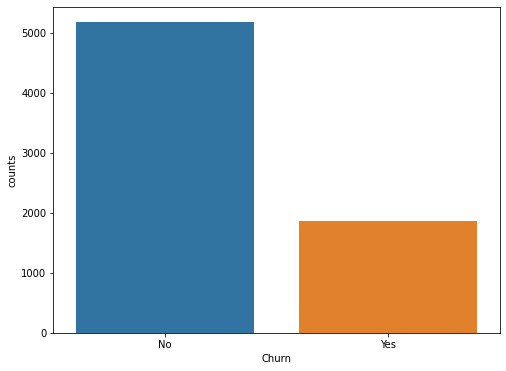

In [10]:
churn = df.groupby('Churn').size().reset_index(name="counts")
print(churn)
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="Churn", y="counts", data=churn)

Pada Kolom target *Churn*, nilai **No** lebih banyak terhadap nilai Yes

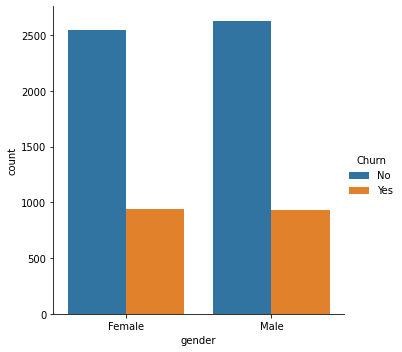

In [11]:
avg = lambda x: sum(x==0)*100.0/len(x)
ax = sns.catplot(x="gender", kind="count", hue="Churn", data=df,
                  estimator=avg)

pada bagian gender, tidak terlalu ada perbedaan signifikan antara male dengan female

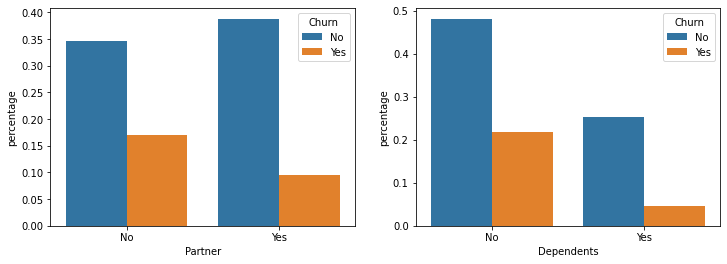

In [12]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
pt = "percentage"
avg_partner = df.groupby('Partner')["Churn"].value_counts()/len(df)
avg_partner = avg_partner.to_frame().rename({"Churn": pt}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y=pt, hue='Churn', data=avg_partner, ax=axis[0])
# Plot Dependents column
avg_depend = df.groupby('Dependents')["Churn"].value_counts()/len(df)
avg_depend = avg_depend.to_frame().rename({"Churn": pt}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y=pt, hue='Churn', data=avg_depend, ax=axis[1])

berdasarkan grafik, cutomer yang tidak memiliki partner lebih banyak melakukan churn, begitu juga dengan customer yang tidak memiliki dependent

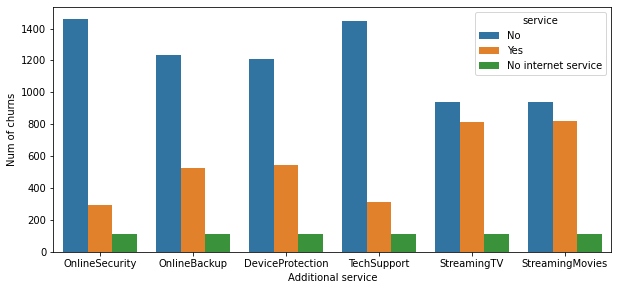

In [13]:
service_cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
plt.figure(figsize=(10, 4.5))
df1 = df[df['Churn'] == "Yes"]
df1 = pd.melt(df1[service_cols]).rename({'value': 'service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='service', hue_order=['No', 'Yes', 'No internet service'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

Pada bagian service, terdapat 6 buah kolom service, dimana lebih banyak customer tidak melakukan churn

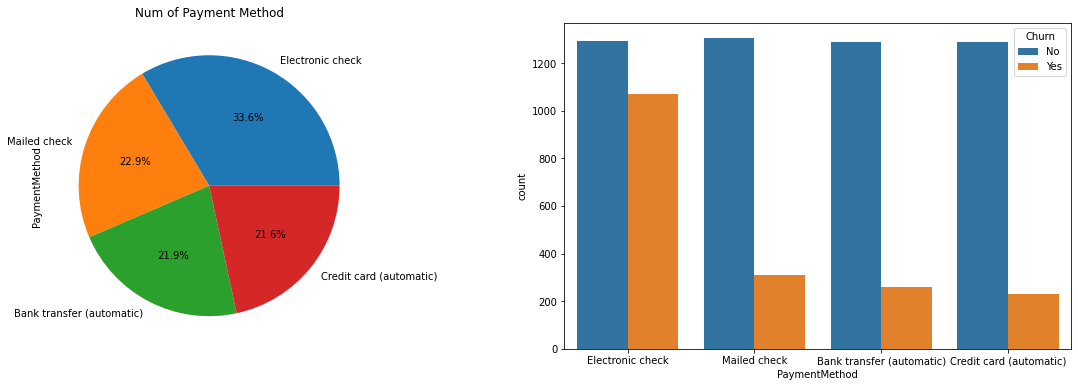

In [14]:
pm = df.groupby('PaymentMethod').size().reset_index(name="counts")
#fig, axs = plt.subplots(ncols=2, figsize = (15,6))
fig = plt.figure(figsize=(20,6))
ax = plt.subplot(1,2,1)
df['PaymentMethod'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Num of Payment Method')
ax = plt.subplot(1, 2, 2)
ax = sns.countplot(data=df, x='PaymentMethod', hue='Churn')
#sns.barplot(x='PaymentMethod', y='counts', data=pm)



- pada paymentmethod, dapat dijelaskan bahwa pembayaran menggunakan electronic check disukai oleh customer
- berbanding lurus dengan tingkat churn, yaitu pada pembayaran lewat electronic check

2. Numerical Features

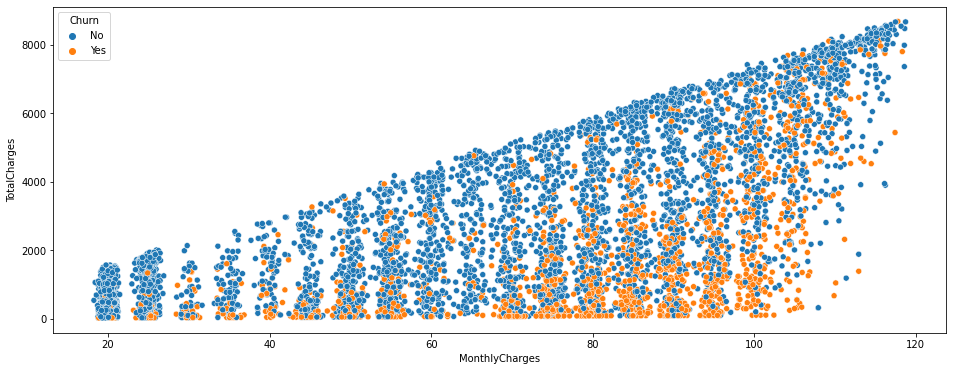

In [15]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges", hue="Churn")

- customer yang melakukan churn rata-rata memiliki monthlycharges yang tinggi namun, secara total tidak.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Two year tenure')

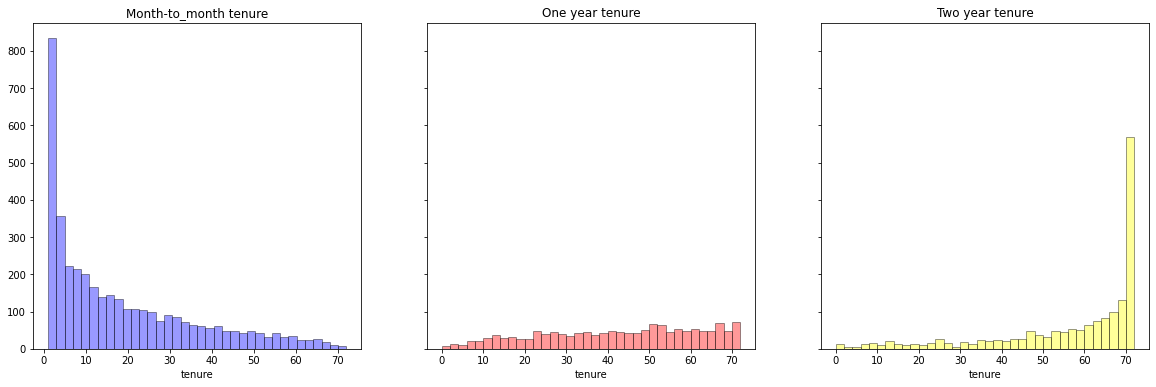

In [16]:
month_tenure = df[df['Contract']=='Month-to-month']['tenure'] 
one_tenure = df[df['Contract']=='One year']['tenure'] 
two_tenure = df[df['Contract']=='Two year']['tenure']

fig, axs = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))
ax = sns.distplot(month_tenure,
                  hist=True, kde=False,
                  bins=36, color = 'blue',
                  hist_kws={'edgecolor':'black'},
                  ax=axs[0])
ax.set_title("Month-to_month tenure")

ax = sns.distplot(one_tenure,
                  hist=True, kde=False,
                  bins=36, color = 'red',
                  hist_kws={'edgecolor':'black'},
                  ax=axs[1])
ax.set_title("One year tenure")

ax = sns.distplot(two_tenure,
                  hist=True, kde=False,
                  bins=36, color = 'yellow',
                  hist_kws={'edgecolor':'black'},
                  ax=axs[2])
ax.set_title("Two year tenure")

pada bagian tenure, dapat disimpulkan bahwa, customer yang memilih tenure selama 2 tahun cukup tinggi.

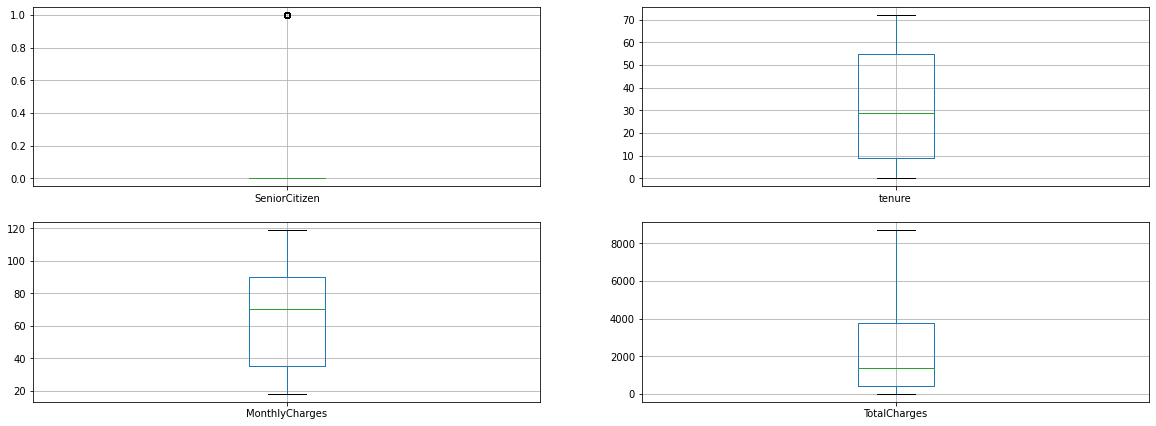

In [17]:
plt.figure(figsize=(20,35))
for i, j in enumerate(df[num_col]):
    ax = plt.subplot(9, 2, i+1)
    df.boxplot(column=j)

pada analisis menggunakan boxplot, tidak terdapat outlier pada dataset

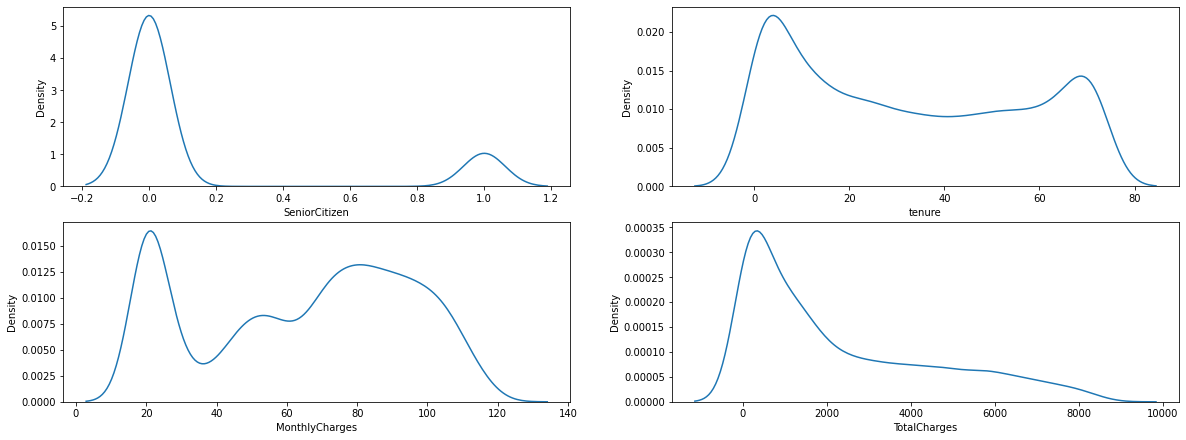

In [18]:
plt.figure(figsize=(20,35))
for i, j in enumerate(df[num_col]):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df[j], ax=ax)
    plt.xlabel(j)

- distribusi pada dataset juga terlihat bagus, data pada totalcharges menunjukan skew, tapi yang lain tidak

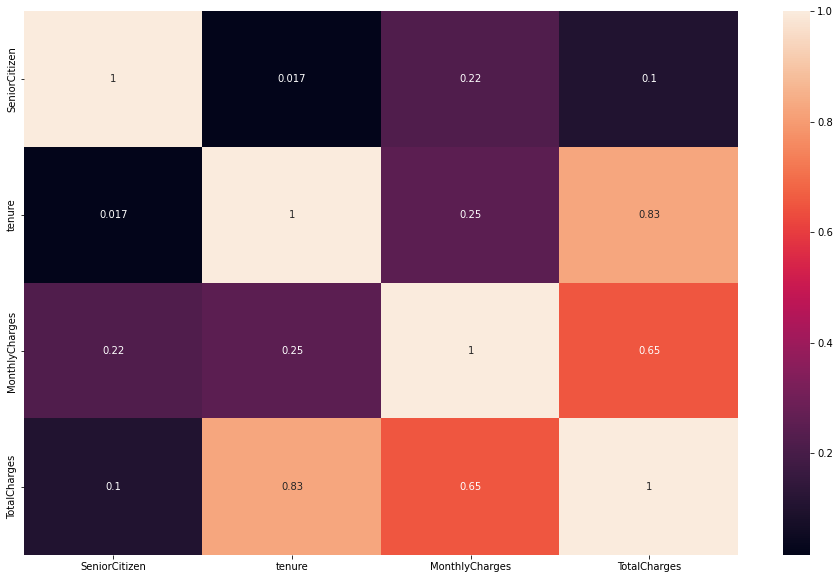

In [19]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

terdapat korelasi yang lumayan tinggi pada totalcharges dan tenure

In [20]:
df.drop('customerID', axis=1, inplace=True)

In [21]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Kesimpulan EDA 
1. terdapat perubahan type totalcharges dari object ke numeric
2. penghapusan kolom customerID karena unik value yang sangat banyak
3. Target Churn lebih banyak pada value No daripada Yes
4. pada gender, partner dan dependent, value no utk Churn signifikan lebih besar daripada Yes
5. Pada bagian service, customer lebih menggunakan streaming movie dan streaming tv
6. Pada MonthlyCharges terdapat keunikan bahwa monthly charges besar lebih banyak churn, namun pada totalcharges tidak, sehingga customer yang churn lebih banyak menggunakan tenure per bulan
7. tidak terdapat outlier
8. terdapat 11 missing value pada dataset

# Preprocessing

1. Split dataset

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=46)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=46)

In [23]:
num_columns = X_train.select_dtypes(['float64', 'int64']).columns
cat_columns = X_train.select_dtypes(['object', 'bool']).columns

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

#pipeline menggunakan sklearn
num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())

pre_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', OneHotEncoder(), cat_columns)
])

In [25]:
import pickle
#save pipeline preprocessing
with open('preprocessing.pkl', 'wb') as f:
  pickle.dump(pre_pipeline, f)

In [26]:
from sklearn.preprocessing import LabelEncoder
#labeling pada target
encode = LabelEncoder()
encode.fit(y_train)
y_train_enc = encode.transform(y_train)
y_test_enc = encode.transform(y_test)
y_val_enc = encode.transform(y_val)

In [27]:
y_train_enc

array([1, 0, 0, ..., 0, 0, 0])

In [28]:
X_train.shape

(6338, 19)

---
# Model Training

In [29]:
X_train = pre_pipeline.fit_transform(X_train)
X_val = pre_pipeline.transform(X_val)
X_test = pre_pipeline.transform(X_test)

In [30]:
X_train.shape

(6338, 45)

In [31]:
import tensorflow as tf
#pipeline tensorflow
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_enc)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test_enc)).batch(32)

a. Modeling with Sequential API

In [32]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.initializers import Zeros, RandomNormal, RandomUniform, GlorotNormal, GlorotUniform, HeNormal, HeUniform
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(3840,activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001),input_shape=(45,)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

history = model.fit(train_dataset, epochs=50, validation_data=(X_val, y_val_enc))

Epoch 1/50
199/199 [==============================] - 6s 8ms/step - loss: 7.6882 - accuracy: 0.6871 - val_loss: 5.6191 - val_accuracy: 0.8156
Epoch 2/50
199/199 [==============================] - 1s 5ms/step - loss: 4.2825 - accuracy: 0.7613 - val_loss: 3.0087 - val_accuracy: 0.8241
Epoch 3/50
199/199 [==============================] - 1s 5ms/step - loss: 2.3181 - accuracy: 0.7820 - val_loss: 1.6601 - val_accuracy: 0.8199
Epoch 4/50
199/199 [==============================] - 1s 5ms/step - loss: 1.3740 - accuracy: 0.7856 - val_loss: 1.0517 - val_accuracy: 0.8199
Epoch 5/50
199/199 [==============================] - 1s 5ms/step - loss: 0.9488 - accuracy: 0.7856 - val_loss: 0.7789 - val_accuracy: 0.8128
Epoch 6/50
199/199 [==============================] - 1s 5ms/step - loss: 0.7487 - accuracy: 0.7943 - val_loss: 0.6368 - val_accuracy: 0.8227
Epoch 7/50
199/199 [==============================] - 1s 6ms/step - loss: 0.6702 - accuracy: 0.7906 - val_loss: 0.5949 - val_accuracy: 0.8156
Epoch 

---
---

Imporvement Model Sequential API

- menggunakan 3 hidden layer (3840, 512, 32)
- menggunakan initializer He normal dengan activation relu
- menggunakan optimizer adam dan loss binary crossentropy

karena overfitting
- ditambah dropout
- ditambah batchnormalization
- ditambah regularizer l2


In [33]:
model.save("churn_model.h5")

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3840)              176640    
                                                                 
 batch_normalization (BatchN  (None, 3840)             15360     
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 3840)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               1966592   
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 512)               0

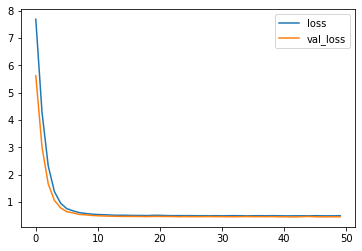

In [35]:
metrics = pd.DataFrame(history.history)
metrics[['loss', 'val_loss']].plot()

In [36]:
print("Evaluate on test data")
results = model.evaluate(test_dataset, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
34/34 [==============================] - 0s 3ms/step - loss: 0.4669 - accuracy: 0.8136
test loss, test acc: [0.4668971300125122, 0.8136234879493713]


In [37]:
from sklearn.metrics import classification_report

y_pred_seq = model.predict(X_test)
#np.where(kondisi, hasil kondisi terpenuhi, hasil jika tidak memnuhi kondisi)
#standar threshold 0.5 (sesuai hasil)
y_pred_seq= np.where(y_pred_seq >= 0.5, 1, 0)
print(classification_report(y_test_enc, y_pred_seq))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       783
           1       0.67      0.56      0.61       274

    accuracy                           0.81      1057
   macro avg       0.76      0.73      0.74      1057
weighted avg       0.81      0.81      0.81      1057



b. Functional API

In [38]:
data_in = Input(shape=(45,))
data_drop_1 = Dropout(0.5)(data_in)
hidden_1 = Dense(3840,activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001),input_shape=(45,))(data_in)
batch_1 = BatchNormalization()(hidden_1)
data_drop_2 = Dropout(0.5)(batch_1)
hidden_2 = Dense(3840,activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001))(data_drop_2)
batch_2 = BatchNormalization()(hidden_2)
data_drop_3 = Dropout(0.5)(batch_2)
hidden_3 = Dense(3840,activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001))(data_drop_3)
batch_3 = BatchNormalization()(hidden_3)
data_drop_4 = Dropout(0.5)(batch_3)
data_out = Dense(1, activation='sigmoid')(data_drop_4)

model = Model(inputs=data_in, outputs=data_out)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=50, validation_data=(X_val, y_val_enc))

Epoch 1/50
199/199 [==============================] - 5s 19ms/step - loss: 19.5390 - accuracy: 0.7297 - val_loss: 13.8283 - val_accuracy: 0.8057
Epoch 2/50
199/199 [==============================] - 3s 16ms/step - loss: 10.1573 - accuracy: 0.7633 - val_loss: 6.9935 - val_accuracy: 0.8071
Epoch 3/50
199/199 [==============================] - 3s 16ms/step - loss: 5.3941 - accuracy: 0.7625 - val_loss: 3.8535 - val_accuracy: 0.8071
Epoch 4/50
199/199 [==============================] - 3s 16ms/step - loss: 3.1924 - accuracy: 0.7678 - val_loss: 2.4435 - val_accuracy: 0.7887
Epoch 5/50
199/199 [==============================] - 3s 16ms/step - loss: 2.1763 - accuracy: 0.7663 - val_loss: 1.8107 - val_accuracy: 0.7688
Epoch 6/50
199/199 [==============================] - 3s 16ms/step - loss: 1.7421 - accuracy: 0.7684 - val_loss: 1.4964 - val_accuracy: 0.7872
Epoch 7/50
199/199 [==============================] - 3s 16ms/step - loss: 1.5148 - accuracy: 0.7643 - val_loss: 1.3578 - val_accuracy: 0.7

In [39]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 45)]              0         
                                                                 
 dense_4 (Dense)             (None, 3840)              176640    
                                                                 
 batch_normalization_3 (Batc  (None, 3840)             15360     
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 3840)              0         
                                                                 
 dense_5 (Dense)             (None, 3840)              14749440  
                                                                 
 batch_normalization_4 (Batc  (None, 3840)             15360     
 hNormalization)                                             

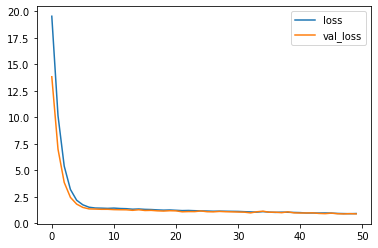

In [40]:
metrics = pd.DataFrame(history.history)
metrics[['loss', 'val_loss']].plot()

In [41]:
#model evaluate
print("Evaluate on test data")
results = model.evaluate(test_dataset, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
34/34 [==============================] - 0s 5ms/step - loss: 0.9045 - accuracy: 0.7739
test loss, test acc: [0.9045239686965942, 0.773888349533081]


In [42]:
y_pred_seq = model.predict(X_test)
#np.where(kondisi, hasil kondisi terpenuhi, hasil jika tidak memnuhi kondisi)
#standar threshold 0.5 (sesuai hasil)
y_pred_seq= np.where(y_pred_seq >= 0.5, 1, 0)
print(classification_report(y_test_enc, y_pred_seq))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       783
           1       0.62      0.34      0.43       274

    accuracy                           0.77      1057
   macro avg       0.71      0.63      0.65      1057
weighted avg       0.75      0.77      0.75      1057



In [43]:
data_inf = df.sample(10, random_state=46)

In [44]:
X = data_inf.drop('Churn', axis=1)
y = data_inf['Churn']

In [45]:
X = pre_pipeline.transform(X)
y = encode.transform(y)

In [46]:
y_pred_inf = model.predict(X)
#np.where(kondisi, hasil kondisi terpenuhi, hasil jika tidak memnuhi kondisi)
#standar threshold 0.5 (sesuai hasil)
y_pred_inf= np.where(y_pred_inf >= 0.5, 1, 0)

In [47]:
y_pred_inf

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]])

In [48]:
pd.DataFrame(y_pred_inf, data_inf['Churn'], columns=['Churn - Inference_predict']).reset_index()

,Churn,Churn - Inference_predict
0,No,0
1,No,0
2,No,0
3,Yes,0
4,No,0
5,No,0
6,No,0
7,No,0
8,No,1
9,No,0


# Kesimpulan
1. Data target terlihat imbalance antara No dan Yes
2. Pada proses Feature Engineering dilakukan drop dan ubah type kolom
3. Pembuatan pipeline tensorflow menggunakan tf.data
4. Proses modeling menggunakan Sequential API dan Functional API dengan improvement : 
Imporvement Model Sequential API

- menggunakan 3 hidden layer (3840, 512, 32)
- menggunakan initializer He normal dengan activation relu
- menggunakan optimizer adam dan loss binary crossentropy

karena overfitting
- ditambah dropout
- ditambah batchnormalization
- ditambah regularizer l2

5. model evaluate dan classification report digunakan untuk mengevaluasi model